In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('multiple_linear_regression_dataset.csv')
df.head()
df.info()

In [5]:
# Step 3: Define Feature Matrix (X) and Target Variable (Y)
X = df[['age', 'experience']].values  # Independent variables
Y = df['income'].values  # Dependent variable
X

In [7]:
Y

array([30450, 35670, 31580, 40130, 47830, 41630, 41340, 37650, 40250,
       45150, 27840, 46110, 36720, 34800, 51300, 38900, 63600, 30870,
       44190, 48700])

In [8]:
# Step 4: Add a Column of Ones to X for the Intercept Term
X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term (intercept)

In [9]:
X

array([[ 1., 25.,  1.],
       [ 1., 30.,  3.],
       [ 1., 47.,  2.],
       [ 1., 32.,  5.],
       [ 1., 43., 10.],
       [ 1., 51.,  7.],
       [ 1., 28.,  5.],
       [ 1., 33.,  4.],
       [ 1., 37.,  5.],
       [ 1., 39.,  8.],
       [ 1., 29.,  1.],
       [ 1., 47.,  9.],
       [ 1., 54.,  5.],
       [ 1., 51.,  4.],
       [ 1., 44., 12.],
       [ 1., 41.,  6.],
       [ 1., 58., 17.],
       [ 1., 23.,  1.],
       [ 1., 44.,  9.],
       [ 1., 37., 10.]])

In [11]:
# Step 5: Compute the Regression Coefficients using Normal Equation
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
theta

array([31261.6898541 ,   -99.19535546,  2162.40419192])

In [12]:
# Step 6: Make Predictions
Y_pred = X @ theta

In [13]:
# Step 7: Evaluate the Model
MSE = np.mean((Y - Y_pred) ** 2)

In [14]:
print("Regression Coefficients (θ):", theta)
print("Mean Squared Error (MSE):", MSE)

Regression Coefficients (θ): [31261.6898541    -99.19535546  2162.40419192]
Mean Squared Error (MSE): 1533633.9787141806


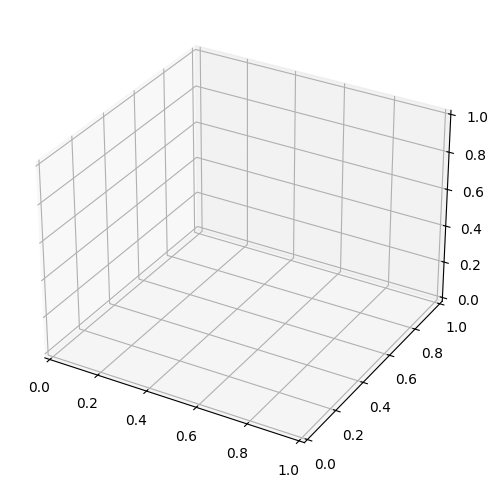

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Step 8: Visualize the Regression Plane
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

In [19]:
# Scatter plot of actual data points
ax.scatter(df['age'], df['experience'], df['income'], color='blue', label='Actual Data')

# Create a mesh grid for prediction
age_range = np.linspace(min(df['age']), max(df['age']), 10)
exp_range = np.linspace(min(df['experience']), max(df['experience']), 10)
age_grid, exp_grid = np.meshgrid(age_range, exp_range)
income_grid = theta[0] + theta[1] * age_grid + theta[2] * exp_grid

# Plot the regression plane
ax.plot_surface(age_grid, exp_grid, income_grid, alpha=0.5, color='orange')

ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Income')
ax.set_title('Multiple Linear Regression Plane')
ax.legend()
plt.show()
